# Grafos con iPython (via [networkx](http://networkx.github.io/))

Cuando instalamos [anaconda](https://www.continuum.io/), entre los paquetes que tiene incorporados está `networkx`.

Vamos a mostrar cómo utilizarlo para realizar operaciones básicas con grafos

En primer lugar vamos a indicar que queremos los gráficos "en línea"; usaremos `pylab` para ello (podríamos utilizar también `matplotlib`)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Ahora cargamos el paquete `networkx` y usamos la abreviatura `nx` (esto se suele hacer para no mezclar funciones con el mismo nombre en distintos paquetes)

In [2]:
import networkx as nx

Creamos nuestro primer grafo. El paquete `networkx` ya tiene predefinidos muchos de los que solemos utilizar. En este caso vamos a trabajar con $K_5$, el grafo completo con cinco vértices

In [3]:
g=nx.complete_graph(5)

Podemos, por ejemplo, pintarlo (y como dijimos arriba que los dibujos serían "en línea", éstos aparecerán en este mismo bloc)

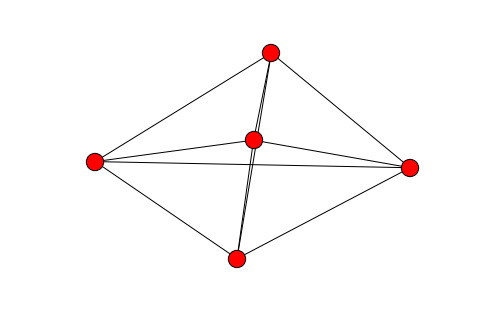

In [4]:
nx.draw(g)

Podemos alterar la forma de dibujar el grafo. Por ejemplo, podemos organizar los vértices en un círculo.

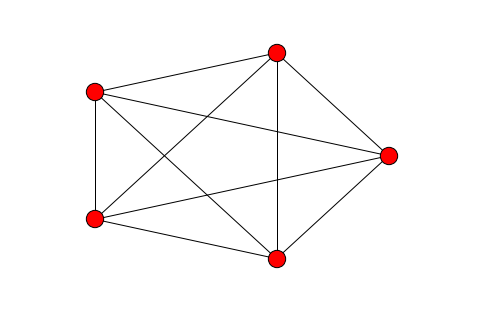

In [5]:
nx.draw_circular(g)

Cada grafo, como objeto, tiene una serie de atributos y métodos específicos implementados para él. Por ejemplo, el grado de sus vértices. La salida es un diccionario, pero es fácil acceder a los valores de los grados.

In [6]:
g.degree()

{0: 4, 1: 4, 2: 4, 3: 4, 4: 4}

In [7]:
list(_.values())

[4, 4, 4, 4, 4]

O el diámetro.

In [8]:
nx.diameter(g)

1

Las componentes conexas también son fáciles de calcular.

In [9]:
list(nx.connected_components(g))

[[0, 1, 2, 3, 4]]

Como era de esperar, es conexo y sólo tiene una componente conexa.

In [10]:
nx.is_connected(g)

True

Definamos ahora un grafo desde el principio. Primero lo creamos con `Graph`.

In [11]:
gg=nx.Graph()

Ahora le podemos añadir lados o vértices como queramos. Podemos usar `add_node`, `add_edge` o bien de una lista como hacemos a continuación.

In [12]:
gg.add_edges_from([(1,2),(3,4)])

In [13]:
list(nx.connected_components(gg))

[[1, 2], [3, 4]]

Veamos cuál es su matriz de adjacencia. Hay que tener en cuenta que `networkx` las almacena de forma dispersa (posiciones no nulas y valor en éstas), y nosotros estamos acostumbrados a la forma densa (forma matricial).

In [14]:
A=nx.adjacency_matrix(gg)

In [15]:
print(A)

  (0, 1)	1
  (1, 0)	1
  (2, 3)	1
  (3, 2)	1


In [16]:
print(A.todense())

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [17]:
A.todense()

matrix([[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]], dtype=int64)

In [18]:
B=nx.incidence_matrix(gg)

In [19]:
B.todense()

matrix([[ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 0.,  1.]])

Vamos ahora si $K_5$ es euleriano, y en caso de serlo, vamos a mostrar un circuito de Euler.

In [20]:
nx.is_eulerian(g)

True

In [21]:
nx.eulerian_circuit(g)

<generator object eulerian_circuit at 0x109e7eab0>

La salida no dice mucho, así que vamos a mostrarla como una lista

In [22]:
list(_)

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

**Ejemplo** (*Generando grafos con características especiales*) Diez personas están sentadas alrededor de una mesa circular. Cada persona estrecha la mano a todos
los demás excepto a la persona sentada directamente enfrente de la mesa. Dibuja un grafo que modele
la situación.

Primero creamos un grafo vacío

In [23]:
G=nx.Graph()

La estrategia que vamos a seguir es crear los lados a partir de parejas. Éstas son elementos $(p,q)$ del producto cartesiano $\{0,\ldots, 9\}^2$ tales que $5\mid p-q$. Para el producto cartesiano vamos a utilizar iteradores, y por ello cargamos `itertools`.

In [24]:
import itertools

En la variable `c` vamos a guardar el producto cartesiano $\{0,\ldots, 9\}^2$

In [25]:
c=list(itertools.product(range(10), repeat=2))

Y ahora seleccionamos las parejas que verifican la condición que impusimos arriba. El conjunto (en este caso hacemos una lista) $e=\{ (a,b)\in c \mid (a-b)\not\equiv 0\ \mathrm{mod}\ 5\}$ lo podemos expresar de la siguente forma:

In [26]:
e=[p for p in c if ((p[0]-p[1])%5)!=0]

Y añadimos estos lados a nuestro grafo.

In [27]:
G.add_edges_from(e)

Ya estamos en condiciones de pintarlo; y lo haremos con etiquetas los nodos del grafo.

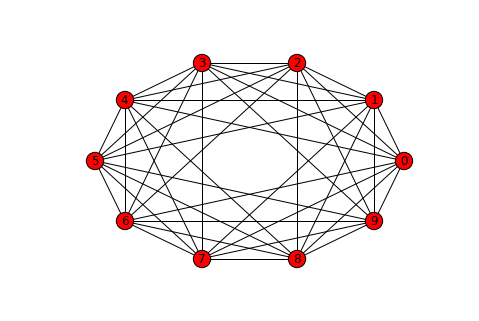

In [28]:
nx.draw_circular(G,with_labels=True)

**Ejemplo** (*Grafos isomorfos*) Vamos a ver si dos grafos dados son isomorfos. Tomemos como $G_1$ el grafo $K_5$ quitando los lados $\overline{13}$ y $\overline{14}$; y $G_2$ el grafo $K_5$ al que quitamos los lados $\overline{03}$ y $\overline{25}$

In [29]:
G1=nx.complete_graph(5)

In [30]:
G2=G1.copy()

In [31]:
G1.remove_edges_from([(1,3),(1,4)])
G2.remove_edges_from([(0,3),(2,5)])

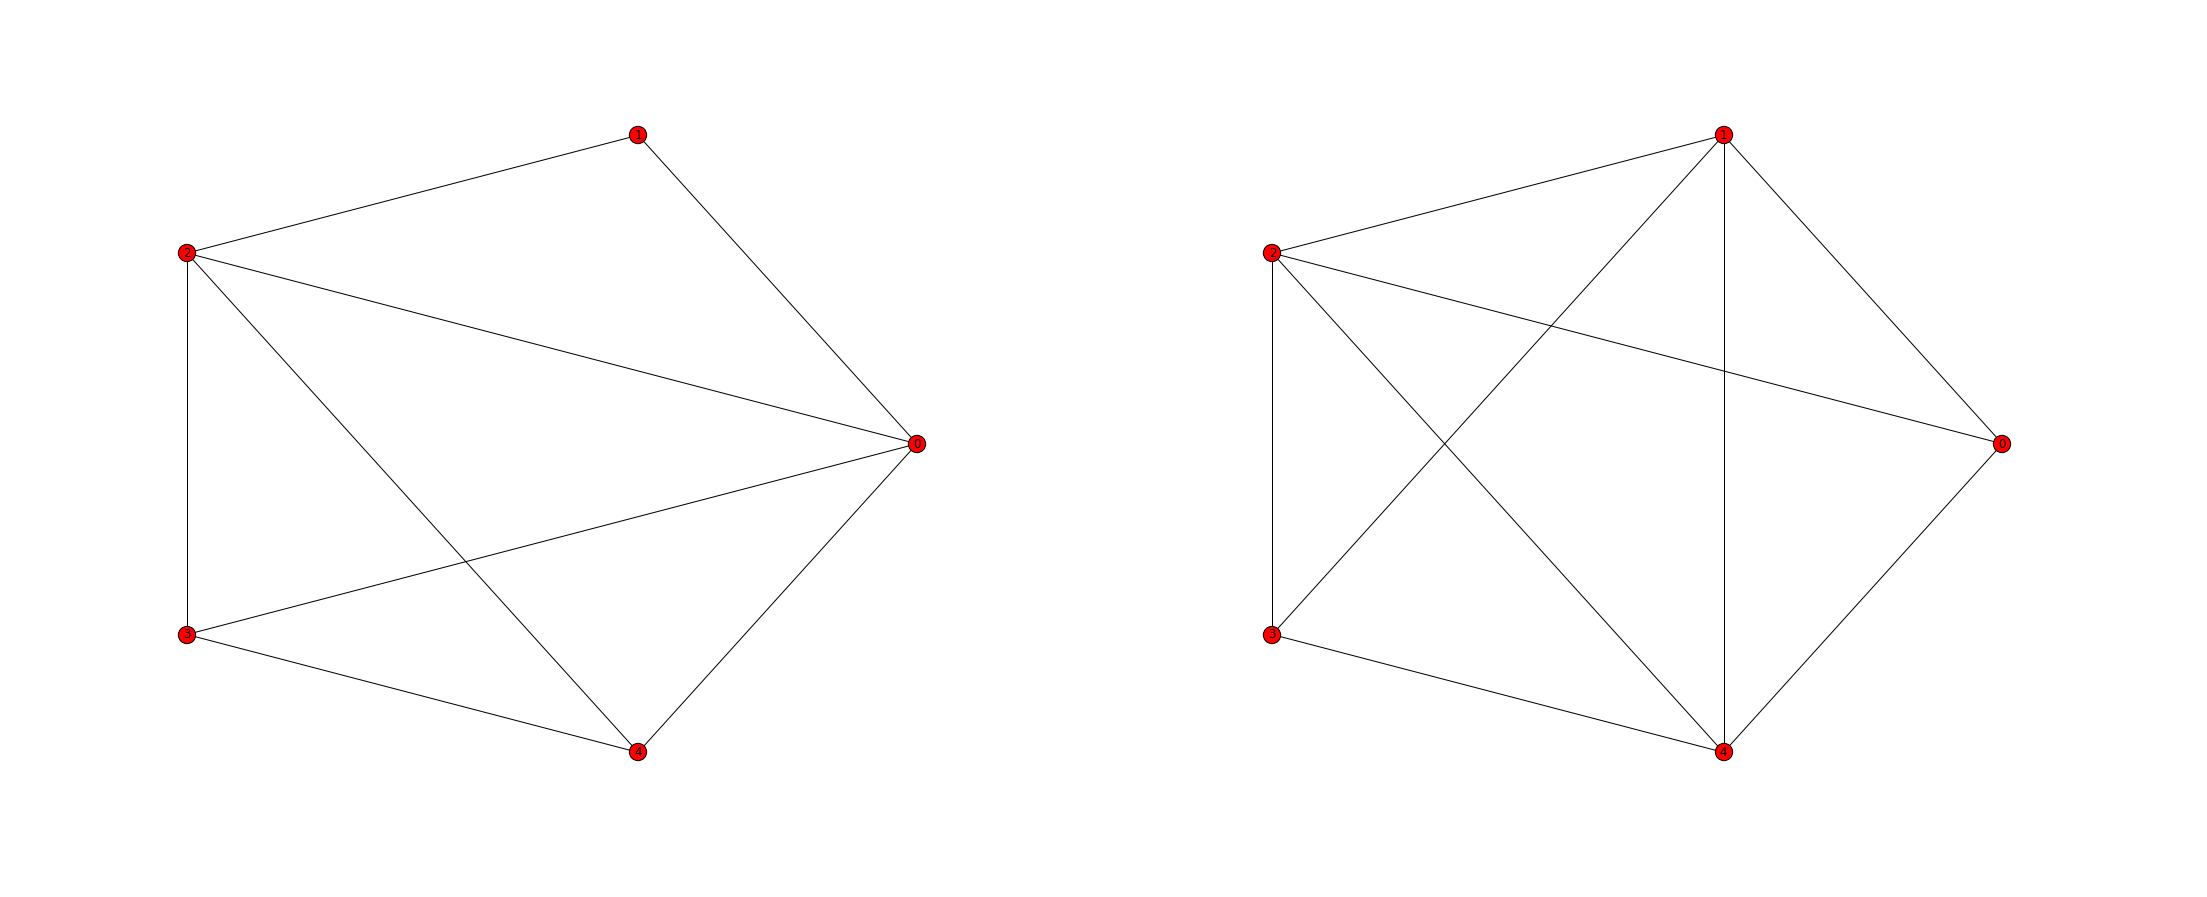

In [197]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=3,wspace=0.01,hspace=1)
plt.subplot(1,2,1)
d1=nx.draw_circular(G1,with_labels=True)
plt.subplot(1,2,2)
d2=nx.draw_circular(G2,with_labels=True)
show()

In [33]:
nx.is_isomorphic(G1,G2)

False

Lo cual es normal, pues las secuencias de grados no son las mismas ni después de reordenar.

In [34]:
list(G1.degree().values())

[4, 2, 4, 3, 3]

In [35]:
list(G2.degree().values())

[3, 4, 4, 3, 4]

**Ejemplo** (*Clasificación salvo isomorfismo*) Vamos a construir todos los subgrafos de $K_4$ salvo isomorfismos.

Nos vamos a centrar en los de cuatro vértices, pues los de tres, dos y uno se pueden extraer de forma análoga a partir de $K_3$, $K_2$ y $K_1$, respectivamente.

In [143]:
G=nx.complete_graph(4)

In [144]:
e=G.edges()

In [38]:
len(e)

6

Creamos una lista con todos los subconjuntons (pasados a lista) del conjunto de lados de G. Para cada lista, iremos creando un grafo eliminando los lados del grafo original que están en esa lista. 

In [145]:
sub=[list(x) for x in list(subsets(e))]

In [146]:
H=[]
for ls in sub:
    Gt=G.copy();
    Gt.remove_edges_from(ls);
    H.append(Gt);
len(H)

64

Tenemos un total de 64 subgrafos de $K_4$ con 4 vértices. Ahora los clasificamos por clases de equivalencia, donde la relación de equivalencia que consideramos es ser isomorfo.

In [147]:
clases=[]
while H!=[]:
    c=[h for h in H if nx.is_isomorphic(H[0],h)]
    clases.append(c)
    H=[h for h in H if not(h in c)]
len(clases)

11

Por último, pintamos los 11 que nos salen.

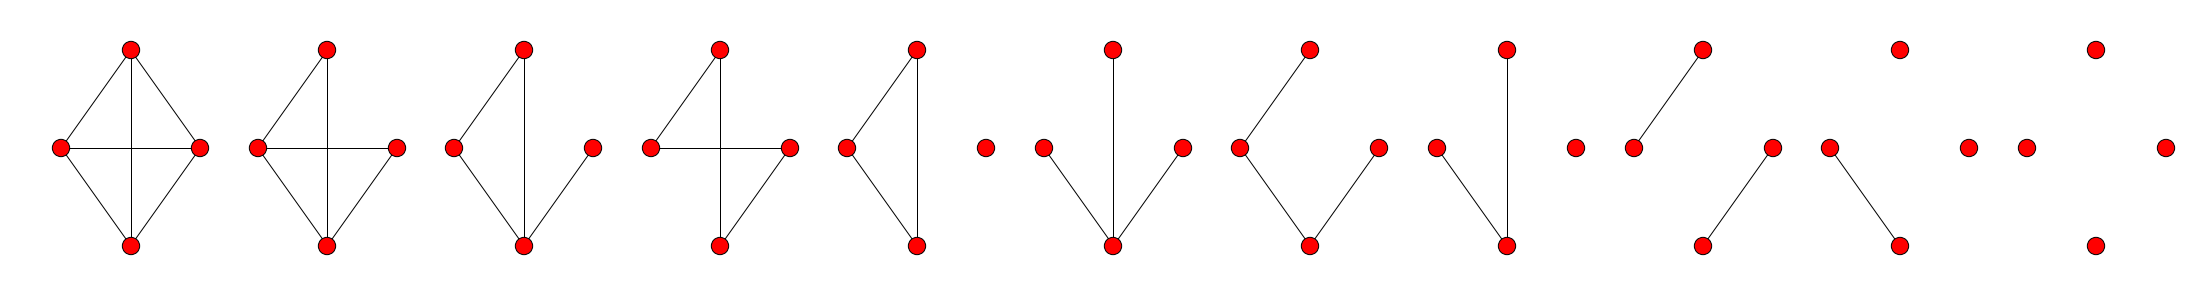

In [191]:
plt.subplots_adjust(left=0,right=5,bottom=0,top=0.95,wspace=0.01,hspace=1)
for i in range(11):
    plt.subplot(1,11,i+1)
    nx.draw_circular(clases[i][0])
show()

**Ejemplo** (*Euler*) El problema de los siete puentes de la ciudad de Königsberg, en la antigua Prusia oriental en el siglo XVIII, ciudad natal de Kant y, actualmente Kaliningrado (Rusia) es un célebre problema matemático que fue resuelto por Leonhard Euler en 1736 y dio origen a la Teoría de Grafos.

La ciudad estaba dividida en cuatro zonas por el río Pregel. Estas cuatro zonas estaban unidas por siete puentes. Los habitantes de la ciudad, durante sus paseos, intentaban encontrar una ruta que cruzase cada uno de los siete puentes una sola vez, y acabase en el mismo lugar que habían empezado.

Euler enfocó el problema representando las cuatro partes de tierra por un punto y cada uno de los siete puentes por una línea, uniendo los puntos que se corresponden. Entonces, el problema anterior se puede trasladar a la siguiente pregunta: ¿se puede recorrer el dibujo terminando en el punto de partida sin repetir las líneas?

El grafo asociado al problema de los puentes de Könisberg es el siguiente.

In [66]:
A=nx.MultiGraph()
A.add_node('A',pos='1,3!')
A.add_node('I',pos='1,2!')
A.add_node('B',pos='1,1!')
A.add_node('C',pos='2,2!')
A.add_edge('A','I')
A.add_edge('A','I')
A.add_edge('I','B')
A.add_edge('I','B')
A.add_edge('A','C')
A.add_edge('I','C')
A.add_edge('B','C')

El problema es que `networkx` no dibuja múltiples lados; para ello necesitaríamos `graphviz`, que necesita una instalación independiente. 

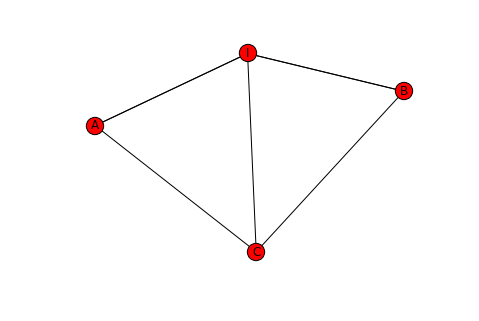

In [67]:
nx.draw(A,with_labels=True)

In [68]:
nx.is_eulerian(A)

False

**Ejemplo** (*Grafos a partir de matrices*) Veamos cómo crear un grafo a partir de una matriz de adjacencia. Las matrices aceptadas por `networkx` son matrices `numpy` (el paquete de cálculo numérico)

In [69]:
import numpy
A=numpy.matrix([[0,1,0,1,1],[1,0,1,1,1],[0,1,0,0,0],[1,1,0,0,0],[1,1,0,0,0]])
G=nx.from_numpy_matrix(A)

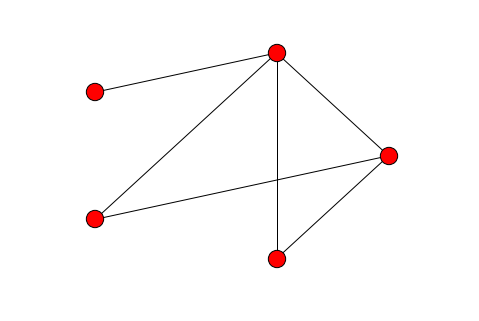

In [70]:
nx.draw_circular(G)

A partir de aquí podemos calcular la de incidencia.

In [71]:
nx.incidence_matrix(G).todense()

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  1.]])

**Ejemplo** (Hamilton) Vamos a mostrar cómo encontrar un camino Hamiltoniano en un grafo; el código está escrito por [Mikkel Alexander Madsen](https://gist.github.com/mikkelam/ab7966e7ab1c441f947b)

In [72]:
def hamilton(G):
    F = [(G,[G.nodes()[0]])]
    n = G.number_of_nodes()
    while F:
        graph,path = F.pop()
        confs = []
        for node in graph.neighbors(path[-1]):
            conf_p = path[:]
            conf_p.append(node)
            conf_g = nx.Graph(graph)
            conf_g.remove_node(path[-1])
            confs.append((conf_g,conf_p))
        for g,p in confs:
            if len(p)==n:
                return p
            else:
                F.append((g,p))
    return None

In [73]:
k4=nx.complete_graph(4)

In [74]:
hamilton(k4)

[0, 3, 2, 1]

In [75]:
k2_4=nx.complete_bipartite_graph(2,4)

In [76]:
hamilton(k2_4)

**Ejemplo** (*Polinomio cromático*) Para calcular el polinomio cromático asociado a un grafo $G$, $p(G,x)$, vamos a utilizar la fórmula $p(G,x)=p(G-e,x)-p(G_e,x)$, donde $G-e$ es el grafo que se obtiene a partir de $G$ quitando el lado $e$ y $G_e$ es el grafo resultante de contraer el lado $e$ (identificar sus vértices). El caso base es cuando no hay lados, y en este caso $p(G,x)=x^{|V|}$, con $V$ el conjunto de vértices de $G$.

Así, lo primero que vamos a hacer es implementar la función contraer.

In [77]:
def contrae(G,v1,v2):
    H=G.copy();
    lados=H.edges();
    #en cada lado cambiamos v1 por v2
    for l in lados:
        if l[0]==v1:
            H.remove_edges_from([l]);
            H.add_edge(v2,l[1]);
        if l[1]==v1:
            H.remove_edges_from([l]);
            H.add_edge(l[0],v2);
    #quitamos los lazos
    lados=H.edges()
    for l in lados:
        if l[0]==l[1]:
            H.remove_edge(l[0],l[1]);
    H.remove_node(v1);
    return H

Ahora, como quiera que vamos a tratar con polinomios, utilizaremos algo para manipular variables y expresiones simbólicas: en este caso usaremos `sympy`. 

Si lo que queremos es el polinomio evaluado en un determinado entero, entonces no necesitamos variable, podemos invocar la función con segundo argumeno el entero deseado.

In [78]:
from sympy import *
x=Symbol("x")
def polcrom(G,x):
    lados=G.edges();
    if len(lados)==0:
        return x**len(G.nodes());
    l=lados[0];
    Gl=G.copy();
    Gl.remove_edges_from([l]);
    Glp=contrae(G,l[0],l[1]);
    return polcrom(Gl,x)-polcrom(Glp,x);

In [79]:
g=nx.complete_graph(5)

In [80]:
polcrom(g,x)

x**5 - 10*x**4 + 35*x**3 - 50*x**2 + 24*x

In [81]:
factor(_)

x*(x - 4)*(x - 3)*(x - 2)*(x - 1)

**Ejemplo** (*Árboles, y bosques*) En `networkx` tenemos varias funciones dedicadas a árboles. Veamos ejemplos de algunas de ellos.

In [82]:
k5=nx.complete_graph(5)

In [83]:
t=nx.minimum_spanning_tree(k5)

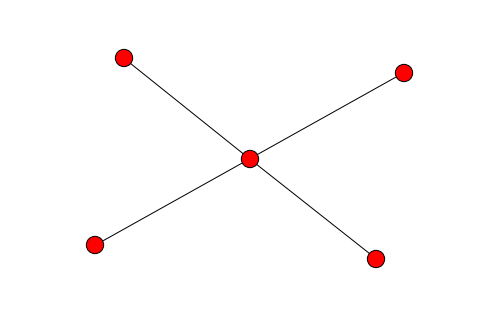

In [84]:
nx.draw(t)

In [85]:
nx.is_tree(t)

True